# DA_HW_3 Support Vector Machine and Decision Trees

# Due on 5/10 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [3]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [4]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel without specifying the C-parameter

In [5]:
X = df[['rate_marriage','educ','occ2','occ3','occ4','occ5','occ6']].to_numpy()
Y = df['had_affair'].to_numpy()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [10]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[849,  36],
       [313,  76]], dtype=int64)

In [12]:
print(classification_report(Y_test,Y_pred))
print(svc.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       885
           1       0.68      0.20      0.30       389

    accuracy                           0.73      1274
   macro avg       0.70      0.58      0.57      1274
weighted avg       0.71      0.73      0.67      1274

0.7260596546310832


In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.2739403453689168
Mean Squared Error: 0.2739403453689168
Root Mean Squared Error: 0.5233931078729608
R-squared: -0.29152251898973214


<AxesSubplot:xlabel='trial'>

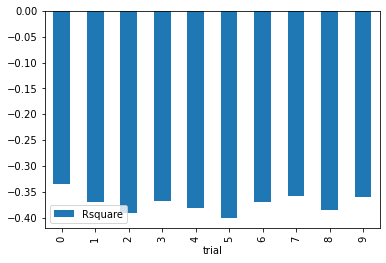

In [15]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### Question 2. Now try different value of C-parameter and rerun your model

### Large C

In [16]:
svc = svm.SVC(kernel='linear', C=2**5)
svc.fit(X_train, Y_train)

SVC(C=32, kernel='linear')

In [17]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[821,  48],
       [319,  86]], dtype=int64)

In [18]:
print(classification_report(Y_test,Y_pred))
print(model.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82       869
           1       0.64      0.21      0.32       405

    accuracy                           0.71      1274
   macro avg       0.68      0.58      0.57      1274
weighted avg       0.70      0.71      0.66      1274

0.7048665620094191


In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.2880690737833595
Mean Squared Error: 0.2880690737833595
Root Mean Squared Error: 0.5367206664395917
R-squared: -0.3284973504382782


<AxesSubplot:xlabel='trial'>

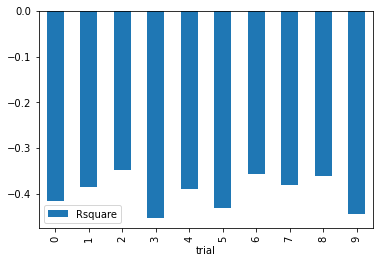

In [20]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [ ]:
### Small C

In [22]:
svc = svm.SVC(kernel='linear', C=2**-5)
svc.fit(X_train, Y_train)

SVC(C=0.03125, kernel='linear')

In [23]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[831,  21],
       [374,  48]], dtype=int64)

In [24]:
print(classification_report(Y_test,Y_pred))
print(model.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81       852
           1       0.70      0.11      0.20       422

    accuracy                           0.69      1274
   macro avg       0.69      0.54      0.50      1274
weighted avg       0.69      0.69      0.61      1274

0.6797488226059655


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.31004709576138145
Mean Squared Error: 0.31004709576138145
Root Mean Squared Error: 0.5568187279190432
R-squared: -0.3996339808201501


<AxesSubplot:xlabel='trial'>

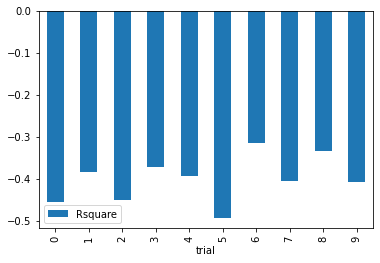

In [26]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### Question 3. Now use rbf as your kernel along with different value for Gamma and C

In [27]:
gammas = [2**5, 2**-5]
c_s = [10, 100, 1000]

---------------------------------------
c: 10\tgamma: 32

[[757 119]
 [244 154]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       876
           1       0.56      0.39      0.46       398

    accuracy                           0.72      1274
   macro avg       0.66      0.63      0.63      1274
weighted avg       0.70      0.72      0.70      1274

Mean Absolute Error: 0.28492935635792777
Mean Squared Error: 0.28492935635792777
Root Mean Squared Error: 0.5337877446681666
R-squared: -0.32644386315137286
---------------------------------------
c: 100\tgamma: 32

[[791  95]
 [248 140]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       886
           1       0.60      0.36      0.45       388

    accuracy                           0.73      1274
   macro avg       0.68      0.63      0.64      1274
weighted avg       0.71      0.73      0.71      1274

Mean Absolute Error: 0.269

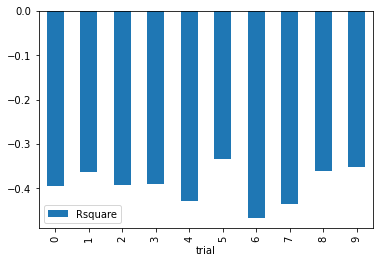

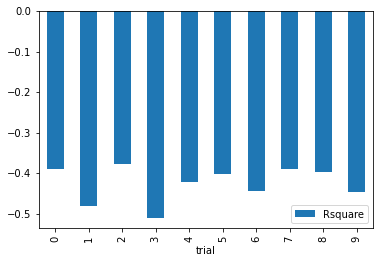

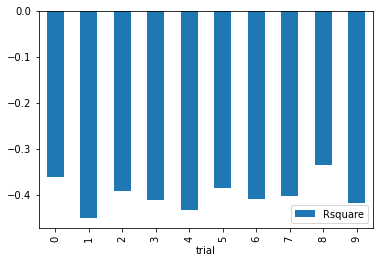

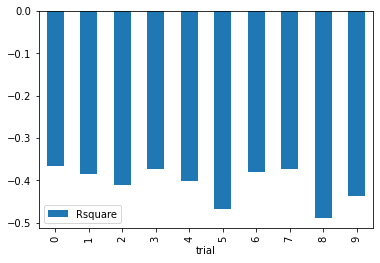

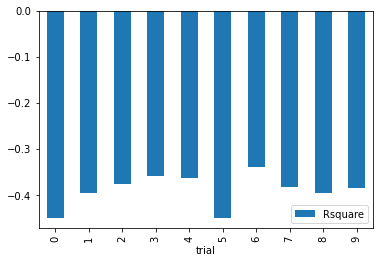

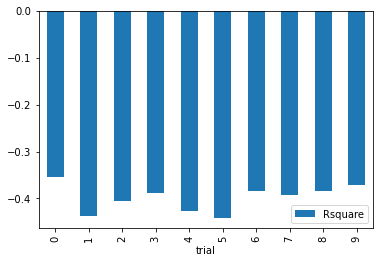

In [30]:
for g in gammas:
    for c in c_s:
        svc = svm.SVC(kernel='rbf', probability=True, C=c, gamma=g)
        svc.fit(X_train, Y_train)
        Y_pred = svc.predict(X_test)
        model.score(X_test, Y_test)
        print('---------------------------------------')
        print('c: ' + str(c) + '\\t' + 'gamma: ' +str(g) + '\n')
        model.score(X_test, Y_test)
        print(confusion_matrix(Y_test, Y_pred))
        print(classification_report(Y_test,Y_pred))
        print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
        print('R-squared:', metrics.r2_score(Y_test, Y_pred))
        rsquare = []
        for i in range(10):
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
            model = svm.SVC()
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
        rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
        rdf.plot.bar(x='trial', y='Rsquare')

### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters? Comment on the effect of using different C and Gamma parameters

Type your answer and code here

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

In [ ]:
predictions = model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

In [ ]:
tree.plot_tree(model)

### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [ ]:
depths=[2,3,4]
criterias=['gini','entropy']
for d in depths:
    for c in criterias:
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        print('---------------------------------')
        print('depth: '+str(d) + '\\t' + 'criterion' + c +'\\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))
        #tree.plot_tree(model)

### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Type your answer and code here

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your answer and code here

In [24]:
# Hint 
model1 = DecisionTreeClassifier(max_depth=1, criterion='gini')
model1.fit(X_train, y_train)
model2 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model2.fit(X_train, y_train)
model3 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model3.fit(X_train, y_train)
# Then display all 3 trees

In [ ]:
tree.plot_tree(model1)

In [ ]:
tree.plot_tree(model2)

In [ ]:
tree.plot_tree(model3)

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

Type your answer and code here

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred))
print(accuracy_score(Y_test, rfc_pred))